# Lab: Introduction to OpenWeather API


Material for **CSC10014 - Computational Thinking** at fit@hcmus, 2025.

Last update: Sep 2025.



## Overview

By the end of this lab, students will be able to:

1. Request basic weather data (such as the current weather and the forecast).
2. Utilize the API to obtain easy-to-understand weather advice or summaries.


## Important Notice

Please **save a copy** of this Notebook to your personal Google Drive.

```
File > Save a copy in Drive
```

<center>
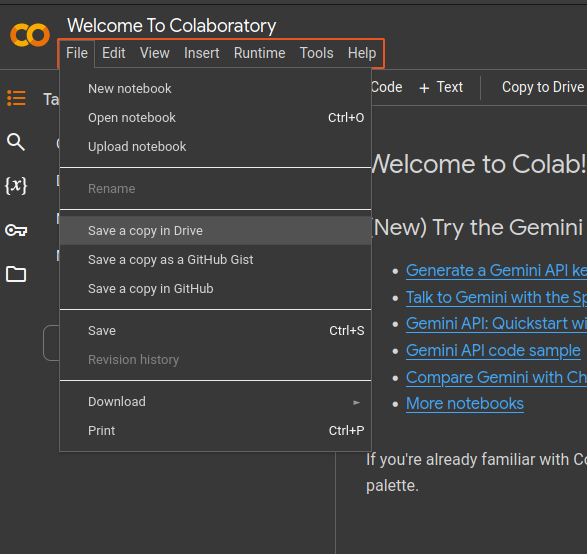
</center>

You must continue your work in the new copy that you have saved.


## 1. Initialization

To begin, please run the code cell below to install the necessary packages:

In [ ]:
!pip install requests -q

Next, run the code cell below to import the required libraries:

In [ ]:
import requests
from datetime import datetime, UTC

## 2. Register for an OpenWeather Account and Generate an API Key

You need an account and a functioning API key from OpenWeather to proceed. Please follow the steps below to register for a new account and obtain your key.

### 2.1. Registration

1. Sign up for a new OpenWeather account using this link: https://home.openweathermap.org/users/sign_in
2. When asked `How and where will you use our API`:
    - For the `Company` field, enter your custom name.
    - For the `Purpose` field, select `Travel`.

<center>
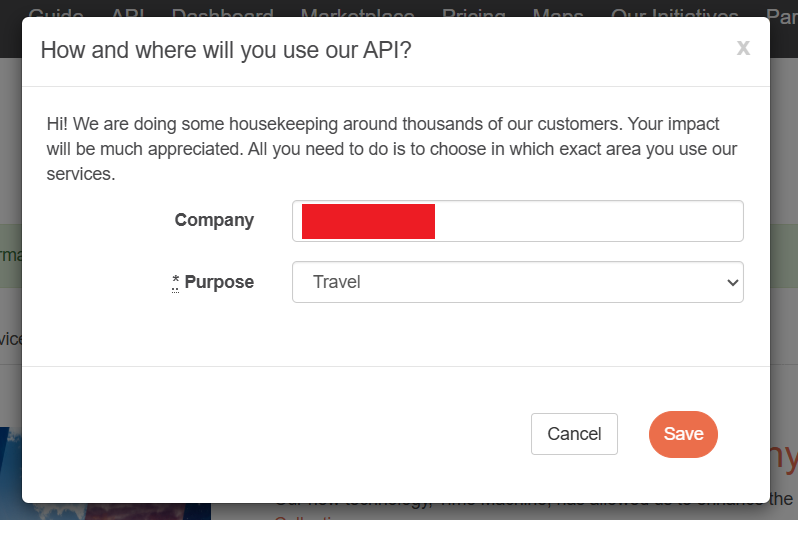
</center>


### 2.2. Obtaining your API Key

OpenWeather will automatically give you a default API key. Please go to the API dashboard using this link:

https://home.openweathermap.org/api_keys

<center>
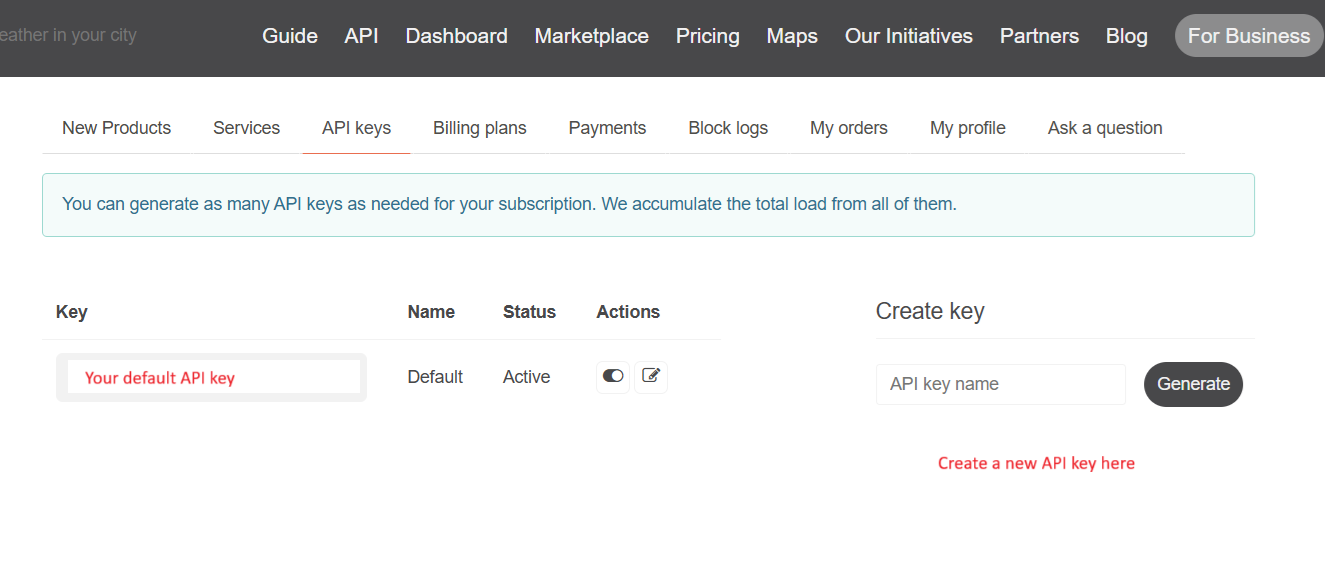
</center>

Once you have your API key, please enter it into the code cell provided below.

In [ ]:
# TODO: Paste your API key here
API_KEY = "YOUR-API-KEY"

# You must not let your API key be shared on the internet under any circumstances.
# If you plan to send this notebook to another person or upload it to a platform like GitHub,
# remember to remove your API_KEY before you do so.

## 3. Basic Weather Information Requests with OpenWeather API v2.5

In this section, you will use the Free Plan APIs to retrieve the current weather and weather forecasts. Please note that you will be using API version 2.5 for all requests in this part.



### 3.1. Retrieve Current Weather by City Name

In [ ]:
def get_current_city_lat_lon(city_name: str, api_key: str) -> tuple:
  """This function get the latitude and longtitude of `city_name`

  In professional applications, you should never hardcode (keep fixed) the API URL directly in your code.
  Instead, you should always define the API URL as a configuration or setting variable.
  """
  url = "http://api.openweathermap.org/geo/1.0/direct"

  params = {
    "q": city_name,
    "limit": 1,               # Change this for more results
    "appid": api_key
  }

  response = requests.get(url, params=params)
  response.raise_for_status()
  data = response.json()      # Remember to parse to JSON!

  if len(data) == 0:
    raise Exception("No city found")

  else:
    # Return the coordinate of the first result.
    return data[0]["lat"], data[0]["lon"]

In [ ]:
def get_current_city_weather(city_name: str, api_key: str) -> dict:
  """This function get the current weather of `city_name`.

  In professional applications, you should never hardcode (keep fixed) the API URL directly in your code.
  Instead, you should always define the API URL as a configuration or setting variable.
  """
  url = "https://api.openweathermap.org/data/2.5/weather"

  # Since the API required latitude and longtitude of the city,
  city_lat, city_lon = get_current_city_lat_lon(
      city_name=city_name,
      api_key=api_key
  )

  params = {
    "lat": city_lat,
    "lon": city_lon,
    "APPID": api_key,
    "units": "metric",   # or "imperial", "standard"
  }

  response = requests.get(url, params=params)
  response.raise_for_status()
  data = response.json()

  return data

In [ ]:
# Get current weather of HCMC
city_name="Ho Chi Minh City, Vietnam"

HCMC_data = get_current_city_weather(city_name=city_name, api_key=API_KEY)

# Print the data to see what's inside.
# print(HCMC_data)

# Print out current weather information fields i.e. temperature, description, humidity and wind speed.
temperature = HCMC_data["main"]["temp"]
humidity = HCMC_data["main"]["humidity"]
wind_speed = HCMC_data["wind"]["speed"]
description = HCMC_data["weather"][0]["description"]

print(f"Current weather in {city_name}:")
print(f"- Temperature: {temperature} °C")
print(f"- Humidity: {humidity}%")
print(f"- Wind speed: {wind_speed} m/s")

Current weather in Ho Chi Minh City, Vietnam:
- Temperature: 31.1 °C
- Humidity: 72%
- Wind speed: 6.17 m/s


### 3.2. Weather Forecast with Data Every 3 Hours

You can search for a 5-day weather forecast that provides data every 3 hours by using geographic coordinates:

In [ ]:
def get_3_hours_city_weather(city_name: str, api_key: str, cnt: int) -> dict:
  """This function get the weather forecast for the 5 days with data every 3 hours

  In professional applications, you should never hardcode (keep fixed) the API URL directly in your code.
  Instead, you should always define the API URL as a configuration or setting variable.
  """
  url = "https://api.openweathermap.org/data/2.5/forecast"

  # Since the API required latitude and longtitude of the city,
  city_lat, city_lon = get_current_city_lat_lon(
      city_name=city_name,
      api_key=api_key
  )

  params = {
    "lat": city_lat,
    "lon": city_lon,
    "cnt": cnt,
    "appid": api_key,
    "units": "metric",   # or "imperial", "standard"
  }

  response = requests.get(url, params=params)
  response.raise_for_status()

  data = response.json()

  return data

In [ ]:
HCMC_data = get_3_hours_city_weather(
    city_name=city_name,
    api_key=API_KEY,
    cnt=8)

In [ ]:
# Want to know what's inside HCMC_data?
# print(HCMC_data)

In [ ]:
for timestamp in HCMC_data["list"]:
  date = datetime.fromtimestamp(timestamp["dt"], UTC)
  temperature = timestamp["main"]["temp"]
  humidity = timestamp["main"]["humidity"]
  description = timestamp["weather"][0]["description"]
  wind_speed = timestamp["wind"]["speed"]

  print(f"Weather in {city_name} at {date}:")
  print(f"- Temperature: {temperature} °C")
  print(f"- Humidity: {humidity}%")
  print(f"- Wind speed: {wind_speed} m/s")
  print(f"- Description: {description}")

Weather in Ben Tre, Vietnam at 2025-09-24 06:00:00+00:00:
- Temperature: 31.1 °C
- Humidity: 72%
- Wind speed: 7.08 m/s
- Description: broken clouds
Weather in Ben Tre, Vietnam at 2025-09-24 09:00:00+00:00:
- Temperature: 30.47 °C
- Humidity: 73%
- Wind speed: 5.68 m/s
- Description: light rain
Weather in Ben Tre, Vietnam at 2025-09-24 12:00:00+00:00:
- Temperature: 29.79 °C
- Humidity: 81%
- Wind speed: 3.44 m/s
- Description: light rain
Weather in Ben Tre, Vietnam at 2025-09-24 15:00:00+00:00:
- Temperature: 26.25 °C
- Humidity: 87%
- Wind speed: 3.99 m/s
- Description: overcast clouds
Weather in Ben Tre, Vietnam at 2025-09-24 18:00:00+00:00:
- Temperature: 26.41 °C
- Humidity: 87%
- Wind speed: 4.65 m/s
- Description: light rain
Weather in Ben Tre, Vietnam at 2025-09-24 21:00:00+00:00:
- Temperature: 25.23 °C
- Humidity: 86%
- Wind speed: 4.1 m/s
- Description: overcast clouds
Weather in Ben Tre, Vietnam at 2025-09-25 00:00:00+00:00:
- Temperature: 25.42 °C
- Humidity: 84%
- Wind sp

## 4. (Advanced) Weather Information Requests with One Call API v3.0

To use the One Call API v3.0, you must first **subscribe** to it. You will need a Visa or Mastercard credit/debit card and must follow these instructions:

1. Go to the [Billing page](https://openweathermap.org/price) and click Subscribe for the One Call API v3.0.

<center>
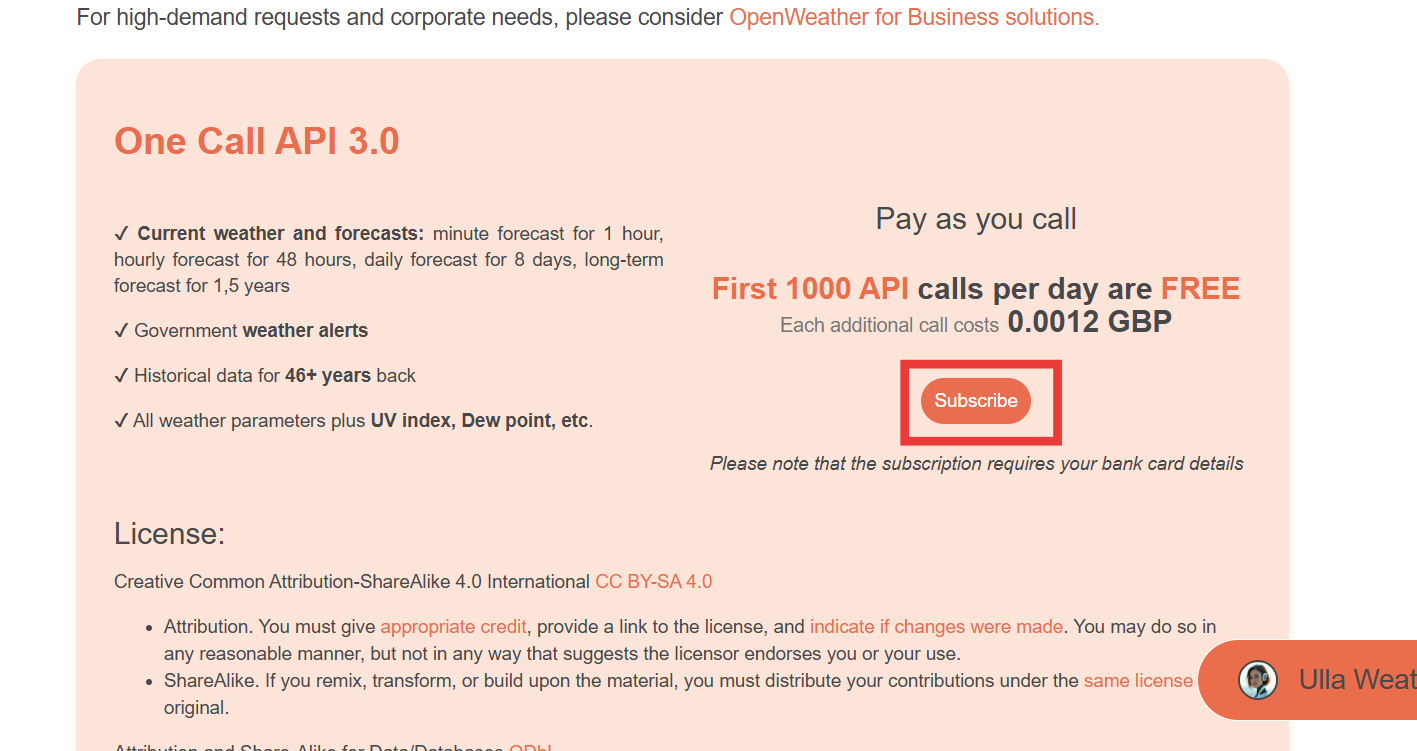
</center>

2. Enter your payment details. You will be redirected to Stripe for the card payment—this amount will be refunded to you shortly.
3. After completing this step, your existing API key will now be granted permission to use the One Call API v3.0.

Finally, please enter your API key into the code cell below. If you upgraded your previous Free account, you can simply paste your original `API_KEY`.

In [ ]:
# TODO: Paste your ONE_CALL_API_KEY here
ONE_CALL_API_KEY = "YOUR-ONE-CALL-API-KEY"

# You must not let your API key be shared on the internet under any circumstances.
# If you plan to send this notebook to another person or upload it to a platform like GitHub,
# remember to remove your API_KEY before you do so.

### 4.1. One-Call Requests

To access the current weather, a minute-by-minute forecast for 1 hour, an hourly forecast for 48 hours, a daily forecast for 8 days, and government weather alerts, you can call the [One-Call API v3.0](https://openweathermap.org/api/one-call-3#current):




In [ ]:
def get_one_call_weather_by_city(city_name: str, api_key: str) -> dict:
  """This function calls One Call API v3.0 for weather informations of `city_name`.

  In professional applications, you should never hardcode (keep fixed) the API URL directly in your code.
  Instead, you should always define the API URL as a configuration or setting variable.
  """
  url = "https://api.openweathermap.org/data/3.0/onecall"

  # Since the API required latitude and longtitude of the city,
  city_lat, city_lon = get_current_city_lat_lon(
    city_name=city_name,
    api_key=api_key
  )

  params = {
    "lat": city_lat,
    "lon": city_lon,
    "appid": api_key,
    "units": "metric",   # or "imperial"
  }

  response = requests.get(url, params=params)
  response.raise_for_status()
  data = response.json()

  return data

In [ ]:
city_name = "Ho Chi Minh City, Vietnam"

# Call One Call API
HCMC_data = get_one_call_weather_by_city(
    city_name=city_name,
    api_key=ONE_CALL_API_KEY)

In [ ]:
# Want to know what's inside HCMC_data?
# print(HCMC_data["daily"])

[{'dt': 1758772800, 'sunrise': 1758753731, 'sunset': 1758797263, 'moonrise': 1758762480, 'moonset': 1758805080, 'moon_phase': 0.1, 'summary': 'Expect a day of partly cloudy with rain', 'temp': {'day': 27.67, 'min': 25.38, 'max': 28.68, 'night': 26.55, 'eve': 26.92, 'morn': 25.45}, 'feels_like': {'day': 29.7, 'night': 26.55, 'eve': 30.12, 'morn': 26.43}, 'pressure': 1007, 'humidity': 67, 'dew_point': 23.53, 'wind_speed': 5.39, 'wind_deg': 247, 'wind_gust': 12.62, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': 100, 'pop': 1, 'rain': 9.19, 'uvi': 2.3}, {'dt': 1758859200, 'sunrise': 1758840127, 'sunset': 1758883624, 'moonrise': 1758851820, 'moonset': 1758894000, 'moon_phase': 0.14, 'summary': 'Expect a day of partly cloudy with rain', 'temp': {'day': 28.8, 'min': 24.66, 'max': 31.31, 'night': 24.66, 'eve': 26.09, 'morn': 25.85}, 'feels_like': {'day': 34.4, 'night': 25.48, 'eve': 26.09, 'morn': 26.79}, 'pressure': 1011, 'humidity': 81, 'de

In [ ]:
# Get 8-days weather forecast:
for timestamp in HCMC_data["daily"]:
  date = datetime.fromtimestamp(timestamp["dt"], UTC)
  temperature = timestamp["temp"]
  humidity = timestamp["humidity"]
  description = timestamp["weather"][0]["description"]
  wind_speed = timestamp["wind_speed"]

  print(f"Weather in {city_name} on {date.date()}:")
  print(f"- Temperature: {temperature} °C")
  print(f"- Humidity: {humidity}%")
  print(f"- Wind speed: {wind_speed} m/s")
  print(f"- Description: {description}")

Weather in Ho Chi Minh City, Vietnam on 2025-09-25:
- Temperature: {'day': 27.67, 'min': 25.38, 'max': 28.68, 'night': 26.55, 'eve': 26.92, 'morn': 25.45} °C
- Humidity: 67%
- Wind speed: 5.39 m/s
- Description: moderate rain
Weather in Ho Chi Minh City, Vietnam on 2025-09-26:
- Temperature: {'day': 28.8, 'min': 24.66, 'max': 31.31, 'night': 24.66, 'eve': 26.09, 'morn': 25.85} °C
- Humidity: 81%
- Wind speed: 6.24 m/s
- Description: light rain
Weather in Ho Chi Minh City, Vietnam on 2025-09-27:
- Temperature: {'day': 27.62, 'min': 24.01, 'max': 27.62, 'night': 24.72, 'eve': 26.43, 'morn': 24.07} °C
- Humidity: 76%
- Wind speed: 3.26 m/s
- Description: moderate rain
Weather in Ho Chi Minh City, Vietnam on 2025-09-28:
- Temperature: {'day': 24.7, 'min': 23.69, 'max': 26.31, 'night': 24.26, 'eve': 24.61, 'morn': 23.76} °C
- Humidity: 93%
- Wind speed: 4.74 m/s
- Description: moderate rain
Weather in Ho Chi Minh City, Vietnam on 2025-09-29:
- Temperature: {'day': 29.14, 'min': 23.92, 'max'

### 4.2. Weather overview

You can use the Open API v3.0 to get a human-readable weather overview by calling the API here: [Weather Overview API](https://openweathermap.org/api/one-call-3#weather_overview)



In [ ]:
def get_one_call_weather_overview(city_name: str, api_key: str) -> dict:
  """This function get the human-readable weather of `city_name`.

  In professional applications, you should never hardcode (keep fixed) the API URL directly in your code.
  Instead, you should always define the API URL as a configuration or setting variable.
  """
  url = "https://api.openweathermap.org/data/3.0/onecall/overview"

  # Since the API required latitude and longtitude of the city,
  city_lat, city_lon = get_current_city_lat_lon(
    city_name=city_name,
    api_key=api_key
  )

  params = {
    "lat": city_lat,
    "lon": city_lon,
    "appid": api_key,
    "units": "metric",   # or "imperial"
  }

  response = requests.get(url, params=params)
  response.raise_for_status()
  data = response.json()

  return data

In [ ]:
city_name="Ben Tre, Vietnam"

overview_data = get_one_call_weather_overview(city_name=city_name, api_key=ONE_CALL_API_KEY)

# Print out the overview - only
print(f"Overview in {city_name}: {overview_data["weather_overview"]}")

Overview in Ben Tre, Vietnam: Currently, the temperature is 26°C with a slight breeze of 2 meters per second. The humidity is quite high at 93%, and the visibility is at 10,000 meters. The sky is partially covered with broken clouds, and the atmospheric pressure is at 1010 hPa. The dew point is also at 25°C, and the UV index is at 0. Overall, it's a relatively mild and humid evening with some clouds in the sky. So, if you're heading out, you might want to grab an umbrella just in case, as there's a chance of some light rain. That's your current weather update. Stay safe and enjoy the rest of your evening.


## Quota Limitations

### OpenWeather API v2.5

The limitations for the v2.5 **Free Plan** are:

- Hourly forecast: **not available**
- Daily forecast: **not available**
- Calls per minute: **60**
- 3-hour forecast: **5 days**


### One Call API v3.0

Your usage limit (quota) for the One Call API v3.0 is 1,000 calls per day. Each request (each function call) you make is counted as 1 call. If you use more than your quota, the response will show the following error code and message

```json
{
  "cod": 429,
  "message": "Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price"
}
```

Also, please be aware that the "Pay as you call" charge for exceeding the limit is **0.0012 GBP** per extra call (which is 1.2 GBP for every 1,000 additional calls).

## You have reached the end!

We hope this lab has been helpful for your project!

Any questions? Please feel free to send an email to: *thquan (at) fit.hcmus.edu.vn*

